In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
# States UFOS sightings
import matplotlib
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

# Graphs
import networkx as nx

# Working with spatial data. Network analysis.

In [3]:
earthquakes = pd.read_csv("earthquakes.csv")

In [4]:
earthquakes.shape

(23412, 21)

In [5]:
earthquakes.dtypes

Date                           object
Time                           object
Latitude                      float64
Longitude                     float64
Type                           object
Depth                         float64
Depth Error                   float64
Depth Seismic Stations        float64
Magnitude                     float64
Magnitude Type                 object
Magnitude Error               float64
Magnitude Seismic Stations    float64
Azimuthal Gap                 float64
Horizontal Distance           float64
Horizontal Error              float64
Root Mean Square              float64
ID                             object
Source                         object
Location Source                object
Magnitude Source               object
Status                         object
dtype: object

In [6]:
earthquakes.Date.str.len().value_counts()

10    23409
24        3
Name: Date, dtype: int64

In [7]:
usual_date_formats = earthquakes.Date.str.len() != 24

In [8]:
earthquakes["DateTime"] = pd.to_datetime(earthquakes[usual_date_formats].Date + " " + earthquakes[usual_date_formats].Time)

In [9]:
null_indices = earthquakes[earthquakes.DateTime.isna()].index

In [10]:
earthquakes.loc[null_indices, "DateTime"] = pd.to_datetime(earthquakes[earthquakes.Date.str.len() == 24].Date)

In [11]:
earthquakes.DateTime.isna().any()

False

In [12]:
earthquakes = earthquakes.drop(columns = ["Date", "Time"])

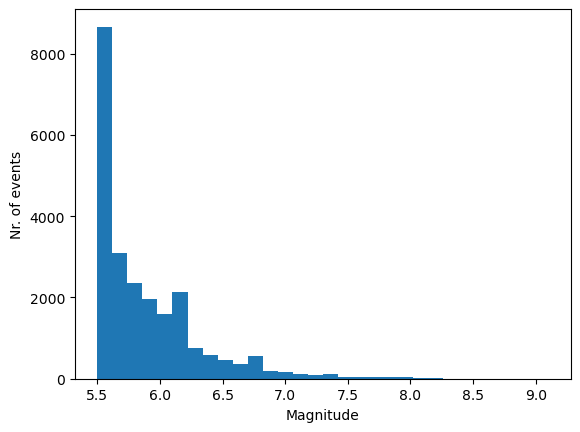

In [13]:
plt.hist(earthquakes.Magnitude, bins=30)
plt.xlabel("Magnitude")
plt.ylabel("Nr. of events")
plt.show()

In [14]:
earthquakes.nlargest(5, "Magnitude")

,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,DateTime
17083,3.295,95.982,Earthquake,30.0,NaN,601.0,9.1,MW,NaN,NaN,22.0,NaN,NaN,1.17,OFFICIAL20041226005853450_30,OFFICIAL,US,OFFICIAL,Reviewed,2004-12-26 00:58:53
20501,38.297,142.373,Earthquake,29.0,NaN,541.0,9.1,MWW,NaN,NaN,9.5,NaN,NaN,1.16,OFFICIAL20110311054624120_30,OFFICIAL,US,OFFICIAL,Reviewed,2011-03-11 05:46:24
19928,-36.122,-72.898,Earthquake,22.9,9.2,454.0,8.8,MWW,NaN,NaN,17.8,NaN,NaN,1.09,OFFICIAL20100227063411530_30,OFFICIAL,US,OFFICIAL,Reviewed,2010-02-27 06:34:12
16,51.251,178.715,Earthquake,30.3,NaN,NaN,8.7,MW,NaN,NaN,NaN,NaN,NaN,NaN,OFFICIAL19650204050122_30,OFFICIAL,ISCGEM,OFFICIAL,Automatic,1965-02-04 05:01:22
17329,2.085,97.108,Earthquake,30.0,NaN,510.0,8.6,MWW,NaN,NaN,22.1,NaN,NaN,0.91,OFFICIAL20050328160936530_30,OFFICIAL,US,OFFICIAL,Reviewed,2005-03-28 16:09:37


In [15]:
earthquakes[earthquakes.Magnitude >= 8].shape

(40, 20)

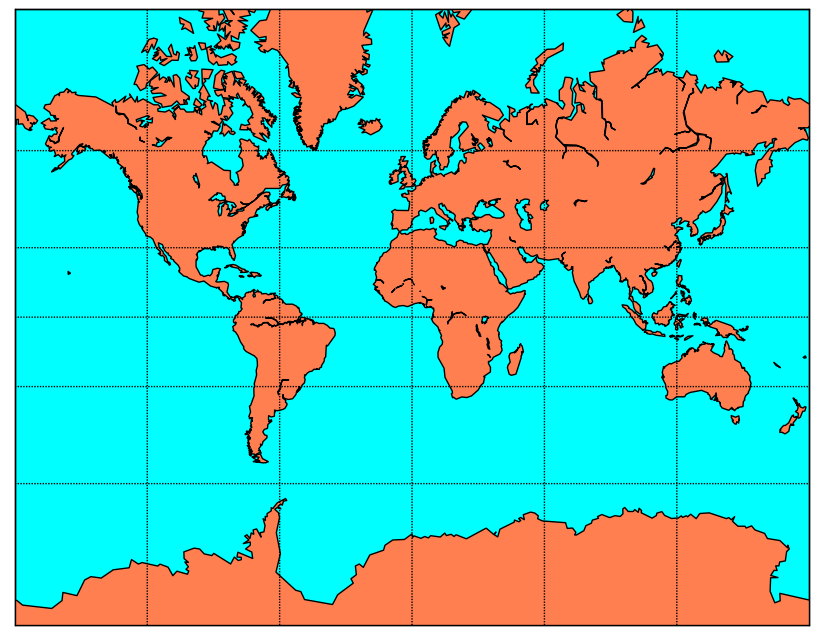

In [16]:
plt.figure(figsize = (18,8))
m = Basemap(
    projection="merc", # Projection of Mercator
    llcrnrlat=-80, # Lower-left lat
    urcrnrlat=80,  # Upper right corner lat
    llcrnrlon=-180, 
    urcrnrlon=180)
m.drawcoastlines()
m.fillcontinents(color="coral", lake_color="aqua")
m.drawparallels(np.arange(-90, 91, 30))
m.drawmeridians(np.arange(-180, 181, 60))
m.drawmapboundary(fill_color="aqua")
plt.show()
# Projection of a shpere object

In [17]:
earthquake_x, earthquake_y = m(earthquakes.Longitude, earthquakes.Latitude)

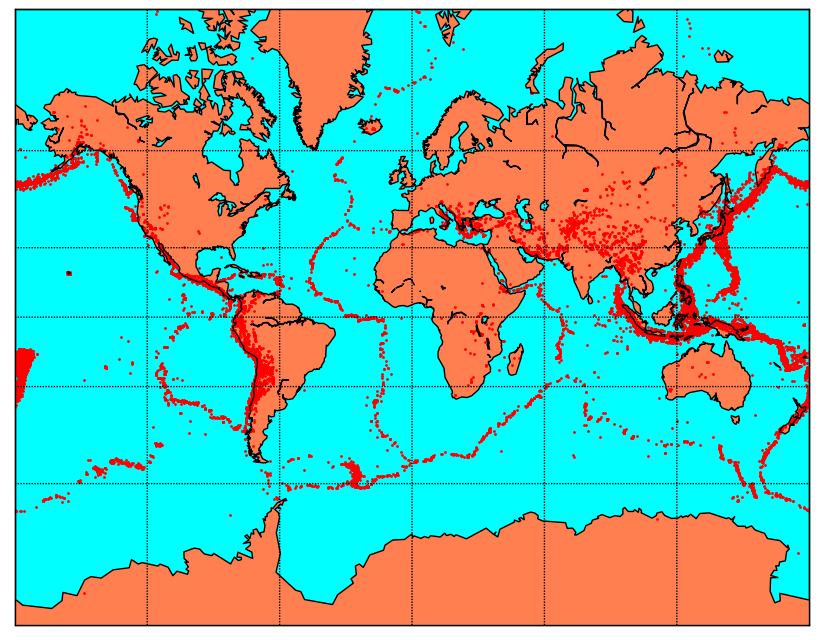

In [18]:
plt.figure(figsize = (18,8))
m = Basemap(
    projection="merc", # Projection of Mercator
    llcrnrlat=-80, # Lower-left lat
    urcrnrlat=80,  # Upper right corner lat
    llcrnrlon=-180, 
    urcrnrlon=180)
m.drawcoastlines()
m.fillcontinents(color="coral", lake_color="aqua")
m.drawparallels(np.arange(-90, 91, 30))
m.drawmeridians(np.arange(-180, 181, 60))
m.drawmapboundary(fill_color="aqua")


plt.scatter(earthquake_x, earthquake_y, s=1, c="red")

plt.show()

### Strongest earthquakes - Magnitude >= 8

In [19]:
strongest_earthquakes = earthquakes[earthquakes.Magnitude >=8]
strongest_earthquakes_x, strongest_earthquakes_y = m(strongest_earthquakes.Longitude, strongest_earthquakes.Latitude)


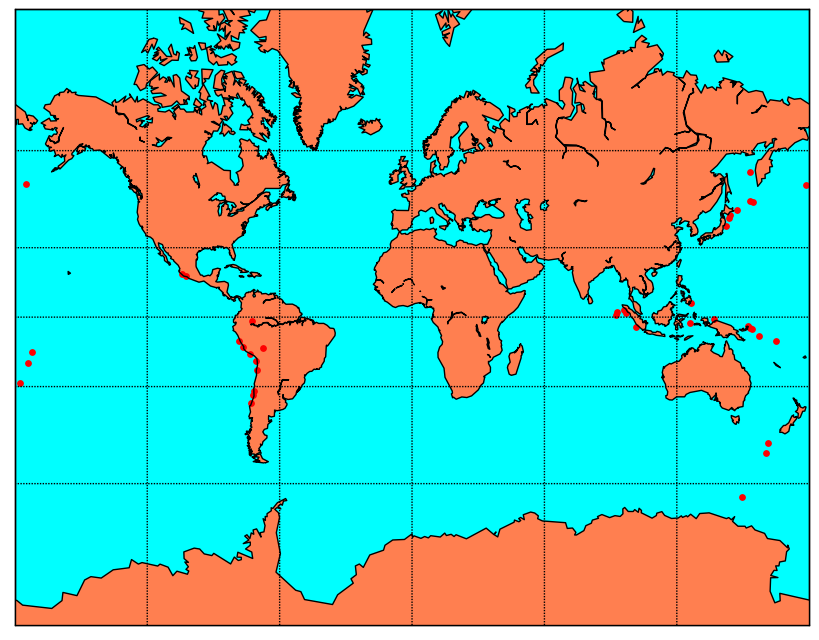

In [20]:
plt.figure(figsize = (18,8))
m = Basemap(
    projection="merc", # Projection of Mercator
    llcrnrlat=-80, # Lower-left lat
    urcrnrlat=80,  # Upper right corner lat
    llcrnrlon=-180, 
    urcrnrlon=180)
m.drawcoastlines()
m.fillcontinents(color="coral", lake_color="aqua")
m.drawparallels(np.arange(-90, 91, 30))
m.drawmeridians(np.arange(-180, 181, 60))
m.drawmapboundary(fill_color="aqua")

plt.scatter(strongest_earthquakes_x, strongest_earthquakes_y, s=15, c="red")
plt.show()

## Volcanos data

In [21]:
volcanoes = pd.read_csv("volcanos.csv")

In [22]:
volcanoes.shape

(1508, 12)

In [23]:
volcanoes_x, volcanoes_y = m(volcanoes.Longitude, volcanoes.Latitude)

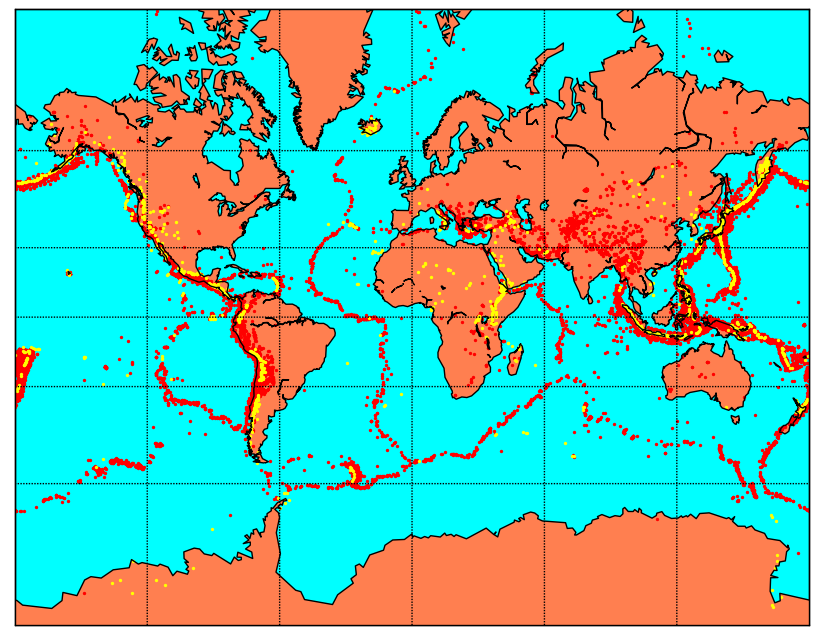

In [24]:
plt.figure(figsize = (18,8))
m = Basemap(
    projection="merc", # Projection of Mercator
    llcrnrlat=-80, # Lower-left lat
    urcrnrlat=80,  # Upper right corner lat
    llcrnrlon=-180, 
    urcrnrlon=180)
m.drawcoastlines()
m.fillcontinents(color="coral", lake_color="aqua")
m.drawparallels(np.arange(-90, 91, 30))
m.drawmeridians(np.arange(-180, 181, 60))
m.drawmapboundary(fill_color="aqua")

plt.scatter(earthquake_x, earthquake_y, s=2, c="red")
plt.scatter(volcanoes_x, volcanoes_y, s=2, c="yellow")

plt.show()

## Choropleth Map - Intensity with Basemap, geopandas

In [25]:
ufos = pd.read_csv("ufo_sightings_scrubbed.csv")

C:\Users\warma\AppData\Local\Temp\ipykernel_13376\2199652291.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  ufos = pd.read_csv("ufo_sightings_scrubbed.csv")


In [26]:
ufos.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [27]:
ufos = ufos.rename(columns= {"longitude ": "longitude"})
ufos.latitude = ufos.latitude.replace({"33q.200088": 33.200088})

In [28]:
ufos.latitude = ufos.latitude.astype(float, errors="ignore")
ufos.longitude = ufos.longitude.astype(float, errors="ignore")

In [29]:
ufo_x, ufo_y = m(ufos.longitude, ufos.latitude)

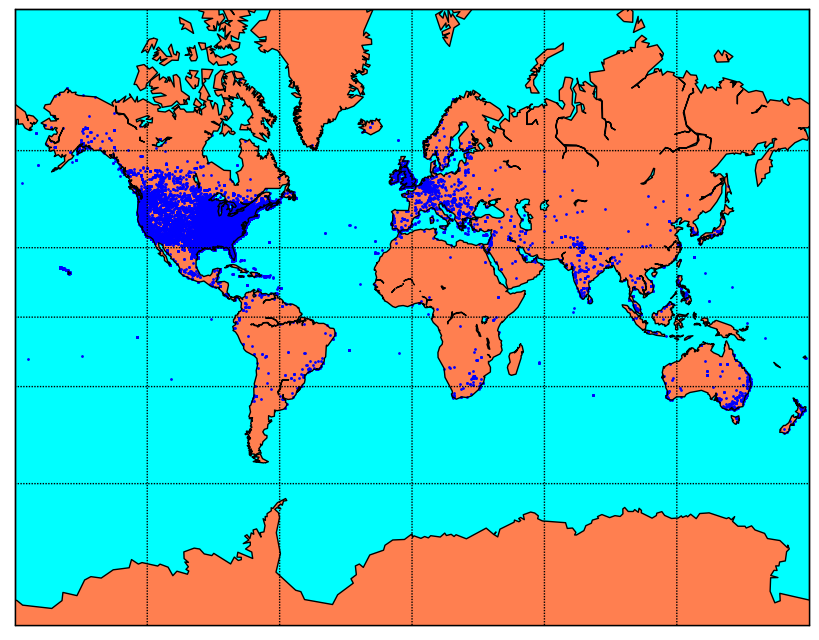

In [30]:
plt.figure(figsize = (18,8))
m = Basemap(
    projection="merc", # Projection of Mercator
    llcrnrlat=-80, # Lower-left lat
    urcrnrlat=80,  # Upper right corner lat
    llcrnrlon=-180, 
    urcrnrlon=180)
m.drawcoastlines()
m.fillcontinents(color="coral", lake_color="aqua")
m.drawparallels(np.arange(-90, 91, 30))
m.drawmeridians(np.arange(-180, 181, 60))
m.drawmapboundary(fill_color="aqua")

plt.scatter(ufo_x, ufo_y, s=1, c="blue")


plt.show()

In [31]:
ufos = ufos[ufos.country=="us"]

In [32]:
ufos.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595000,-82.188889
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.117500,-73.408333


In [33]:
states = pd.read_csv("states.csv")

In [34]:
states.head()

,abbreviation,name
0,AK,Alaska
1,AL,Alabama
2,AR,Arkansas
3,AS,American Samoa
4,AZ,Arizona


In [35]:
states["state_lower"] = states.abbreviation.str.lower()

In [36]:
ufos = ufos.merge(states, left_on="state", right_on="state_lower")

In [37]:
ufos.state = ufos["name"]

In [38]:
ufos.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,abbreviation,name,state_lower
0,10/10/1949 20:30,san marcos,Texas,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,TX,Texas,tx
1,10/10/1956 21:00,edna,Texas,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,TX,Texas,tx
2,10/10/1977 12:00,san antonio,Texas,us,other,30,30 seconds,i was about six or seven and my family and me ...,2/24/2005,29.423889,-98.493333,TX,Texas,tx
3,10/10/1980 19:00,houston,Texas,us,sphere,180,3 min,Sphere&#44 No lights&#44 moving through neigh...,4/16/2005,29.763056,-95.363056,TX,Texas,tx
4,10/10/1980 22:00,dallas,Texas,us,unknown,300,5 minutes,Strange shape shifting craft of pure light ene...,10/28/2002,32.783333,-96.800000,TX,Texas,tx


In [39]:
num_sights_by_state = ufos.value_counts("state")

In [40]:
num_sights_by_state.head()

state
California    8912
Washington    3966
Florida       3835
Texas         3447
New York      2980
dtype: int64

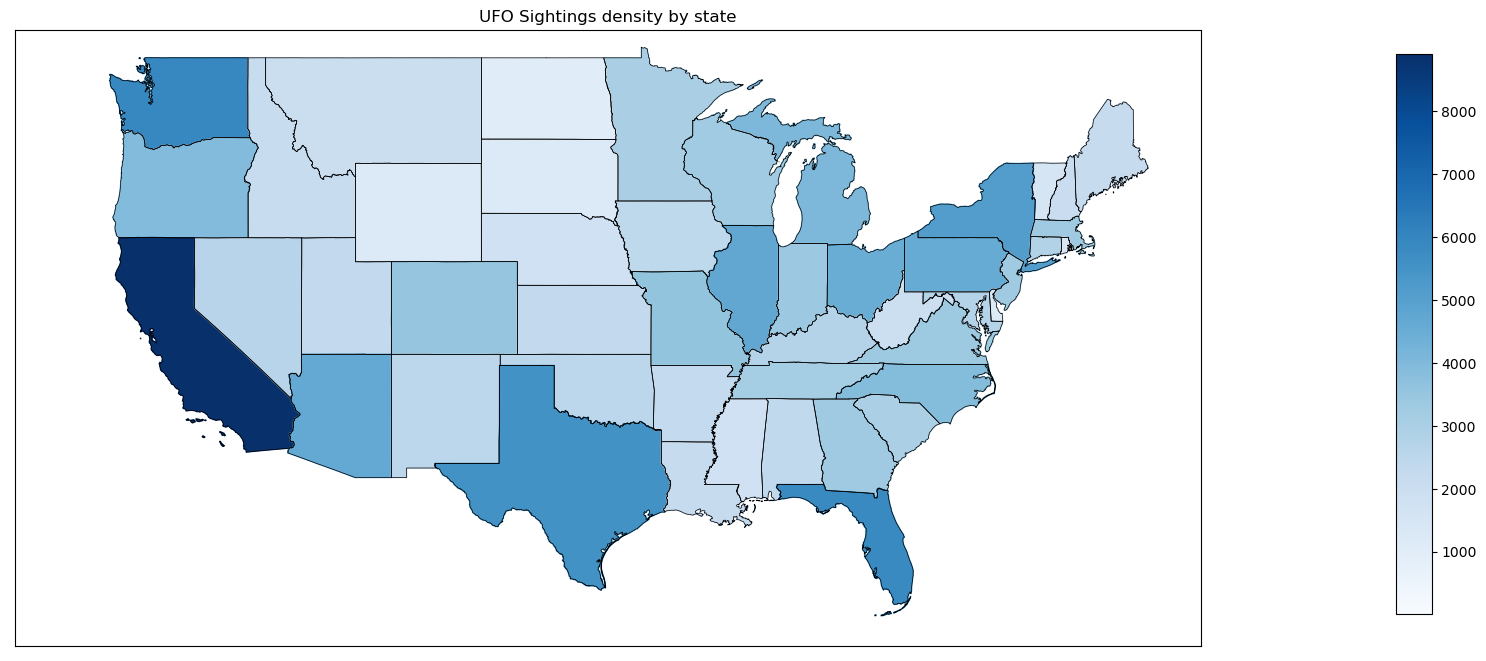

In [41]:
fig = plt.figure(figsize = (18,8))
m = Basemap(
    projection="merc", # Projection of Mercator
    llcrnrlat=23, # Lower-left lat
    urcrnrlat=50,  # Upper right corner lat
    llcrnrlon=-130, 
    urcrnrlon=-64)

us_info = m.readshapefile("st99_d00", "states", drawbounds=True)
colors = {}
state_names = []

cmap = plt.cm.Blues
vmin = num_sights_by_state.min()
vmax = num_sights_by_state.max()

for shape_dict in m.states_info:
    state_name = shape_dict["NAME"]
    
    if state_name not in ["District of Columbia", "Puerto Rico"]:
        sightings = num_sights_by_state[num_sights_by_state.index == state_name][0]
        colors[state_name] = cmap(np.sqrt((sightings - vmin) / (vmax-vmin)))[:3]
        
    state_names.append(state_name)
    
ax = plt.gca()

for nshape, seg in enumerate(m.states):
    if state_names[nshape] not in ["District of Columbia", "Puerto Rico"]:
        color = rgb2hex(colors[state_names[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor=color)
        ax.add_patch(poly)
        
plt.title("UFO Sightings density by state")
colorbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
matplotlib.colorbar.ColorbarBase(colorbar_ax, cmap=cmap, norm=matplotlib.colors.Normalize(vmin, vmax))
plt.show()

## Graphs, trees, DAGs

In [42]:
g = nx.Graph()

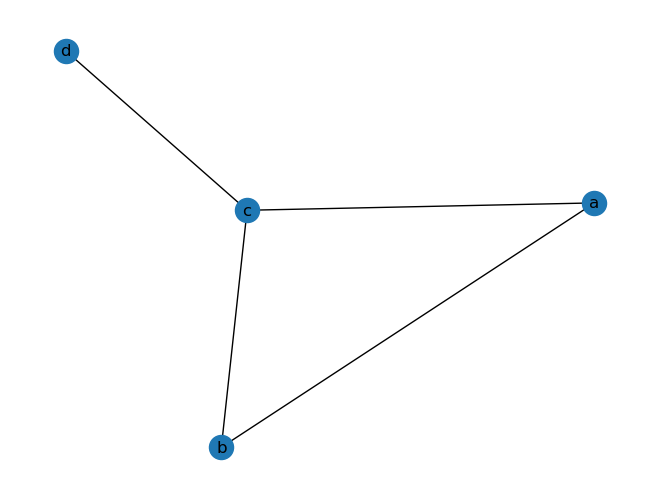

In [43]:
g.add_edge("a", "b", weight=0.1)
g.add_edge("b", "c", weight=1.5)
g.add_edge("a", "c", weight=1)
g.add_edge("c", "d", weight=2.2)

nx.draw(g, with_labels=True)

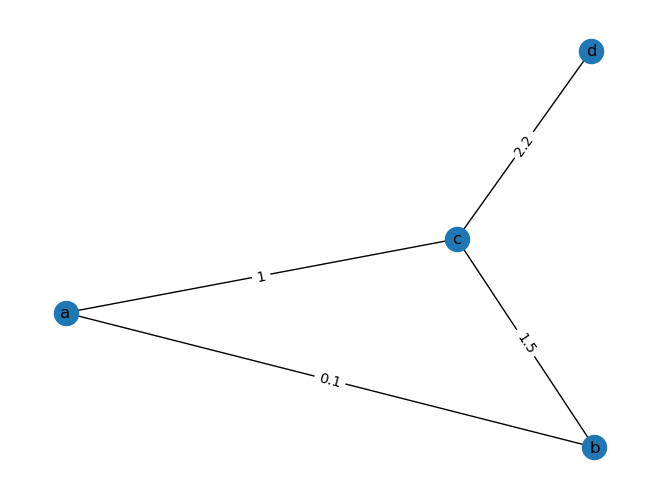

In [44]:
pos = nx.spring_layout(g)
weights = nx.get_edge_attributes(g, "weight")
nx.draw(g, pos, with_labels=True)

nx.draw_networkx_edge_labels(g, pos, edge_labels=weights)
# nx.draw_networkx_edges(g, pos, width=[v*2 for v in weights.values()])
plt.show()

### Graph shortest paths

In [45]:
nx.shortest_path(g, "b", "d", weight="weight")

['b', 'a', 'c', 'd']

In [46]:
nx.shortest_path(g, "b", "d")

['b', 'c', 'd']

In [47]:
g.add_edge("one", "two", weight=2.8)


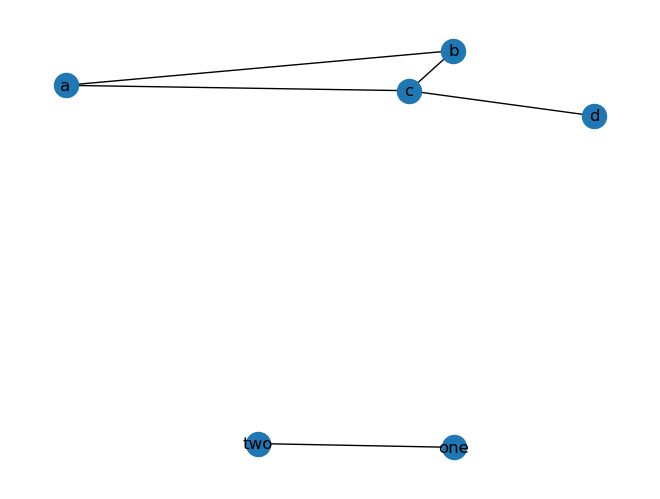

In [48]:
nx.draw(g, with_labels=True)

In [49]:
# nx.shortest_path(g, "b", "two")

### Directed graphs

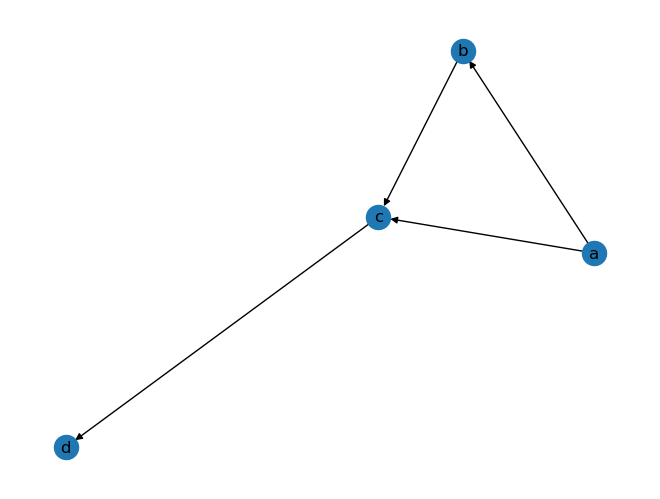

In [50]:
g = nx.DiGraph()
g.add_edge("a", "b", weight=0.1)
g.add_edge("b", "c", weight=1.5)
g.add_edge("a", "c", weight=1)
g.add_edge("c", "d", weight=2.2)

nx.draw(g, with_labels=True)

In [51]:
fb_graph = nx.read_edgelist("facebook_combined.txt")

In [52]:
# nx.draw(fb_graph)

### Centrality - the importance of a node

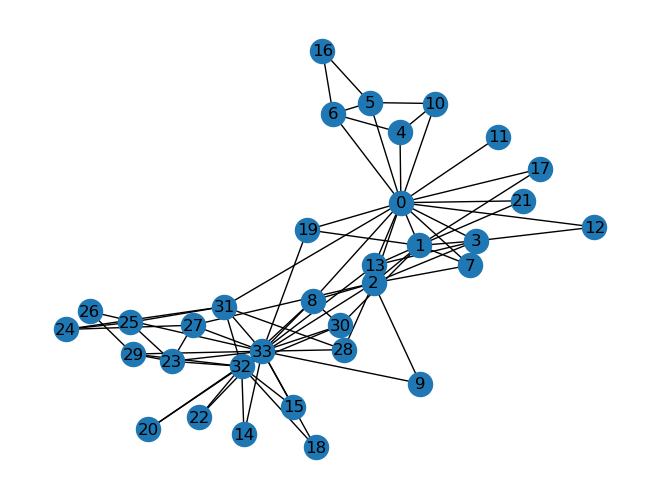

In [53]:
karate_graph = nx.karate_club_graph()
nx.draw(karate_graph, with_labels=True)
plt.show()

In [54]:
a = nx.betweenness_centrality(karate_graph)

In [55]:
# b = sorted(a.items(), key=lambda x: -x[1])
# b

In [56]:
list(nx.community.girvan_newman(karate_graph))[0]

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
 {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})

In [57]:
list(nx.community.girvan_newman(karate_graph))[1]

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
 {2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33},
 {9})

In [58]:
list(nx.community.girvan_newman(karate_graph))[4]

({0, 1, 3, 7, 12, 13, 17, 19, 21},
 {2, 24, 25, 27, 28, 31},
 {4, 5, 6, 10, 16},
 {8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33},
 {9},
 {11})

### DAGs - Directed acyclic graph

In [59]:
op_graph = nx.DiGraph()

In [78]:
op_graph.add_edge("a", "d")
op_graph.add_edge("b", "e")
op_graph.add_edge("c", "e")
op_graph.add_edge("d", "f")
op_graph.add_edge("e", "f")



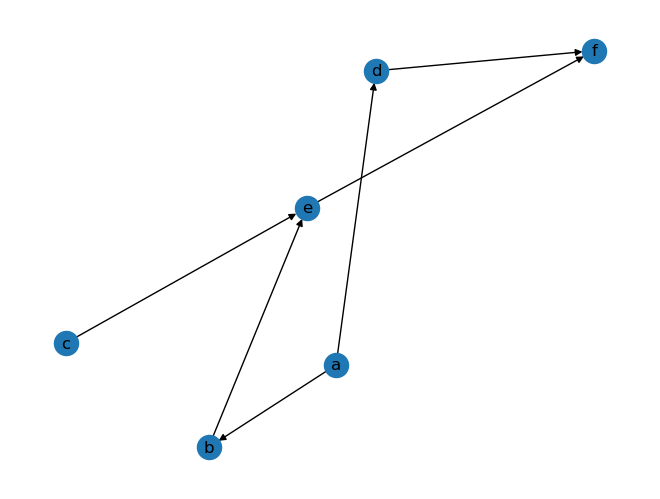

In [79]:
nx.draw(op_graph, with_labels=True)

In [80]:
list(nx.topological_sort(op_graph))

['a', 'c', 'b', 'd', 'e', 'f']